In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Sequential

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [17]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [27]:
df = pd.read_csv('MonthyConsumptionPercentageChanges.csv')

In [28]:
df

,DATE,Consumption
0,2000-01-01,-0.3
1,2000-02-01,1.0
2,2000-03-01,0.6
3,2000-04-01,-0.1
4,2000-05-01,0.5
...,...,...
241,2020-02-01,-0.1
242,2020-03-01,-6.5
243,2020-04-01,-12.4
244,2020-05-01,8.3


In [29]:

df = pd.DataFrame(data=df,columns=['Consumption'])

In [30]:
df

,Consumption
0,-0.3
1,1.0
2,0.6
3,-0.1
4,0.5
...,...
241,-0.1
242,-6.5
243,-12.4
244,8.3


In [31]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

196 50


In [32]:
time_steps = 12

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Consumption, time_steps)
X_test, y_test = create_dataset(test, test.Consumption, time_steps)

print(X_train.shape, y_train.shape)

(184, 12, 1) (184,)


In [33]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [34]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/30
11/11 [==============================] - 0s 37ms/step - loss: 0.1488 - val_loss: 0.0355
Epoch 2/30
11/11 [==============================] - 0s 10ms/step - loss: 0.1366 - val_loss: 0.0374
Epoch 3/30
11/11 [==============================] - 0s 9ms/step - loss: 0.1337 - val_loss: 0.0350
Epoch 4/30
11/11 [==============================] - 0s 9ms/step - loss: 0.1328 - val_loss: 0.0334
Epoch 5/30
11/11 [==============================] - 0s 9ms/step - loss: 0.1316 - val_loss: 0.0337
Epoch 6/30
11/11 [==============================] - 0s 9ms/step - loss: 0.1303 - val_loss: 0.0328
Epoch 7/30
11/11 [==============================] - 0s 9ms/step - loss: 0.1295 - val_loss: 0.0323
Epoch 8/30
11/11 [==============================] - 0s 9ms/step - loss: 0.1285 - val_loss: 0.0319
Epoch 9/30
11/11 [==============================] - 0s 9ms/step - loss: 0.1278 - val_loss: 0.0314
Epoch 10/30
11/11 [==============================] - 0s 10ms/step - loss: 0.1271 - val_loss: 0.0311
Epoch 11/30
11/1

In [35]:
y_pred = model.predict(X_test)

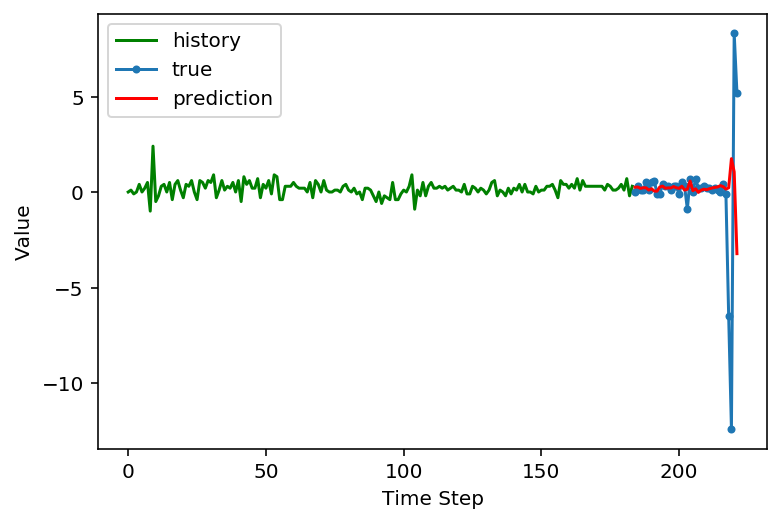

In [36]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();